1. Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


2. Load Preprocessed Data

In [10]:
df = pd.read_csv("../data/processed/cleaned_telco.csv")
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)
    
if df['Churn'].dtype == 'object':
        print("Unique values in 'Churn' before encoding:", df['Churn'].unique())
        df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Replace 'No internet service' and 'No phone service'
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                'StreamingTV', 'StreamingMovies', 'MultipleLines']
for col in service_cols:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

# Convert TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median())


0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

3. Feature Engineering

In [11]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Encode categorical
cat_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()
scaler = StandardScaler()

for col in cat_cols:
    X[col] = le.fit_transform(X[col])
    X[col] = scaler.fit_transform(X[[col]])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4. Try Different Models


In [19]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("Random Forest:")
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))
print(accuracy_score(y_test, rf_preds))


Random Forest:
[[940  96]
 [197 176]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

0.7920511000709723


In [20]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

print("XGBoost:")
print(confusion_matrix(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))
print(accuracy_score(y_test, xgb_preds))


XGBoost:
[[916 120]
 [174 199]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.62      0.53      0.58       373

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

0.7913413768630234


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:37:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


5. Visual Comparison (Optional but Useful)

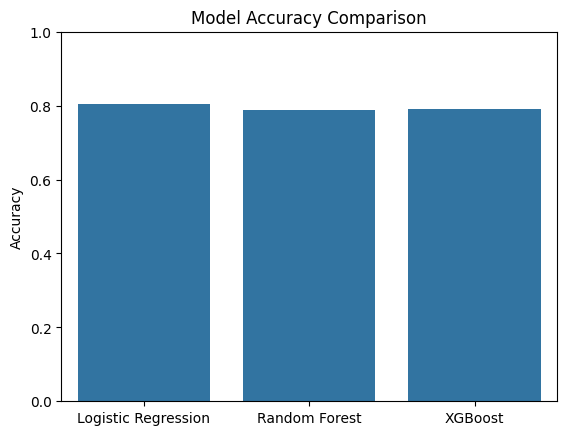

In [16]:
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(y_test, lr_preds),
    accuracy_score(y_test, rf_preds),
    accuracy_score(y_test, xgb_preds)
]

sns.barplot(x=models, y=accuracies)
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.show()
